# Laboratorio 5

## Task 1

1. Defina y explique qué “expected sarsa”  
Expected Sarsa se puede definir como una variante del algoritmo de SARSA original, este en vez de utilizar el valor Q del estado de la acción siguiente especifico como en SARSA, expected SARSA utiliza la esperanza matemática del valor Q de todas las posibilidades acciones que se pueden tomar en el siguiente estado, ponderadas por la política de comportamiento.

    a. ¿Cómo se diferencia de “sarsa”?  
Expected SARSA se diferencia de SARSA principalmente en como se realiza la actualización de la función de acción-valor Q(s,a). En SARSA, la actualización se basa en el valor Q(s’,a’) de la acción especifica a’ que se tomo en la siguiente estado s’, en cambio expected SARSA calcula la esperanza matemática de los valores Q(s’,a’) para todas las acciones posibles a’ en el estado siguiente s’, ponderadas según la política actual π(a′ ∣s′), esta diferencia hace que expected SARSA sea mas estable, ya que suaviza las actualizaciones al considerar todas las posibles acciones.

    b. ¿Para qué sirven las modificaciones que se hacen sobre “sarsa”?  
Las modificaciones implementadas en expected SARSA sobre el algoritmo SARSA sirven principalmente para mejorar la estabilidad y la velocidad de convergencia durante el aprendizaje, al utilizar la esperanza matemática de los valores 	Q(s’,a’) de todas las acciones posibles en el estado siguiente, esto hace que se reduzca la varibailidad de las actualizaciones de la función de acción-valor.

2. Defina y explique qué es “n-step TD”  
N-step TD es un método de aprendizaje por refuezo que extiende el enfoque de TD(0) al considerar recompensas acumuladas a lo largo de múltiples pasos antes de actualizar la función de valor V(s) o la función de acción-valor Q(s,a) a diferencia de TD(0), que actualiza la función de valor en función de la recompensa inmediata y el valor del siguiente estado, n-step TD espera hasta que se haya acumulado n recompensas antes de realizar la actualización, esta actualización permite que las mismas sean mas precisas e informadas.


    a. ¿Cómo se diferencia de TD(0)?  
n-step TD se diferencia de TD(0) en que acumula recompensas a lo largo de n pasos antes de actualizar la función de valor, mientras que TD(0) actualiza la función de valor utilizando solo la recompensa inmediata y el valor del siguiente estado.

    b. ¿Cuál es la utilidad de esta modificación?  
La utilidad de modificación en n-steps TD se puede mencionar que es la capacidad para equilibrar entre la rapidez y la precisión de las actualizaciones, al considerar n pasos en lugar de solo uno, como en el otro método, n-stet TD permite incorporar mas informacion sobre el futuro antes de actualizar la función de valor, lo que conduce a decisiones mas informadas, esto también se puede mencionar que reduce la varianza en comparación a un método de monte carlo.

    c. ¿Qué usa como objetivo?  
En n-step TD, el objetivo que se utiliza para actualizar la función de valor es una suma ponderada de las recompensas acumuladas a lo largo de n pasos, mas el valor estimado del estado alcanzado después de esos n pasos, específicamente, el objetivo es la suma de las recompensas descontadas obtenidas en cada uno de los pasos n pasos más el valor de la función de valor V(st + n) o Q(st+n, at+n) del estado final al cabo de esos n pasos.

3. ¿Cuál es la diferencia entre SARSA y Q-learning?  
La principal diferencia entre SARSA y Q learing radica en el enfoque de aprendizaje y la forma en que se actualizan la función de acción- valor Q(s,a). SARSA es un algoritmo on policy, lo que significa que este actualiza la función Q utilizando la acción que realmente se tomo en el siguiente estado, siguiendo la política actual durante el proceso de aprendizaje, esto implica que SARSA aprende una política que es mas suave y adaptada a las acciones efectivamente ejecutadas por otro lado Q-learning es un algoritmo off policy, que actualiza la función Q utilizando el valor máximo de todas las posibles acciones en el siguiente estado, independientemente de la acción que se tomada.

## Task 2

### 1 y 2

In [1]:
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
import time

### 3. Inicializar entorno

In [2]:
env = gym.make('CliffWalking-v0')
learning_rate = 0.1
discount = 0.9
epsilon = 0.1
n_episodes = 1000
max_steps = 100

### 4. SARSA

In [3]:
def choose_action(Q, state):
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state, :])
	return action

In [4]:
def learn(Q, state, state2, reward, action, action2):
	predict = Q[state, action]
	target = reward + discount * Q[state2, action2]
	Q[state, action] = Q[state, action] + learning_rate * (target - predict)

In [5]:
def SARSA():
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = 0
    episode_rewards = []
    for _ in range(n_episodes):
        t = 0
        state, info = env.reset()
        done = False
        action = choose_action(Q, state)
        total_rewards = 0
        while not done and t < max_steps:
            env.render()
            state2, reward, done, _, info = env.step(choose_action(Q, state))
            action2 = choose_action(Q, state2)
            learn(Q, state, state2, reward, action, action2)
            state = state2
            action = action2
            rewards += reward
            total_rewards += reward
        episode_rewards.append(total_rewards)

    return episode_rewards

### 5. Q-learning

In [6]:
def q_learn(Q, state, state2, reward, action):
    predict = Q[state, action]
    target = reward + discount * np.max(Q[state2, :])
    Q[state, action] = Q[state, action] + learning_rate * (target - predict)

In [7]:
def q_learning():
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = 0
    episode_rewards = []

    for _ in range(n_episodes):
        t = 0
        state, info = env.reset()
        done = False
        total_rewards = 0
        while not done and t < max_steps:
            env.render()
            action = choose_action(Q, state)
            state2, reward, done, _, info = env.step(action)
            q_learn(Q, state, state2, reward, action)
            state = state2
            rewards += reward
            total_rewards += reward
        episode_rewards.append(total_rewards)

    return episode_rewards

In [8]:
episode_rewards_sarsa = SARSA()
episode_rewards_q_learning = q_learning()

C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\gymnasium\envs\toy_text\cliffwalking.py:196: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CliffWalking-v0", render_mode="rgb_array")
  gym.logger.warn(


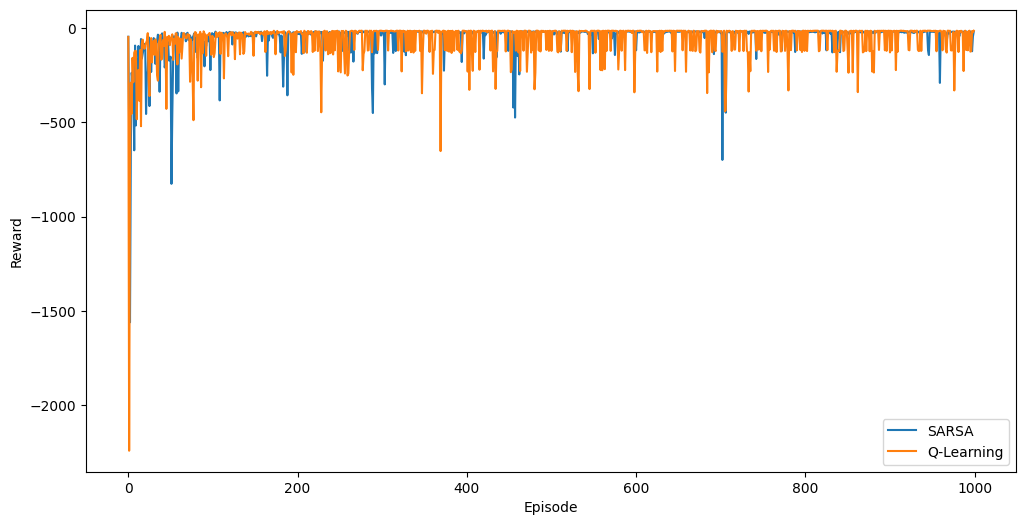

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(episode_rewards_sarsa, label='SARSA')
plt.plot(episode_rewards_q_learning, label='Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

### 8. Análisis de resultados

a. Observe los resultados graficados y compare el rendimiento de SARSA y Q-Learning a lo largo de
los episodios.  

**Convergencia:**

Ambos algoritmos muestran una tendencia a mejorar su rendimiento con el tiempo, acercándose a valores de recompensa cercanos a cero a medida que avanza el número de episodios.

Sin embargo, parece que Q-Learning (en naranja) tiene una tasa de aprendizaje inicial más rápida que SARSA (en azul), ya que las recompensas negativas más grandes disminuyen más rápidamente en Q-Learning.


**Estabilidad:**

Q-Learning parece tener más fluctuaciones y picos negativos grandes en los episodios posteriores, lo que sugiere que es menos estable en comparación con SARSA. SARSA, aunque comienza con fluctuaciones más grandes, parece estabilizarse mejor después de un número significativo de episodios.


**Comparación General:**

Aunque Q-Learning muestra un mejor rendimiento inicial, SARSA parece ser más estable a largo plazo, con menos caídas pronunciadas en la recompensa. Q-Learning podría alcanzar un rendimiento alto más rápido, pero con mayor riesgo de fluctuaciones.




b. Considere cómo cada algoritmo equilibra la exploración y la explotación.

Como es un algoritmo "on-policy", SARSA tiende a ser más conservador en cuanto a las decisiones que toma. Debido a que el algoritmo sigue su política actual, la exploración es parte integral del proceso de aprendizaje, ya que la política puede elegir acciones no óptimas para equilibrar la exploración y la explotación. Esto puede resultar en una política que es menos propensa a caer en mínimos locales y muestra un comportamiento de aprendizaje más estable.

Al ser "off-policy", Q-Learning es más agresivo en cuanto a la explotación de lo que ya ha aprendido, tratando de maximizar la recompensa lo más rápido posible. Esto puede llevar a un aprendizaje más rápido en algunos casos, pero también puede resultar en menos estabilidad y más oscilaciones, como se puede observar en la gráfica.


#### Análisis de la Gráfica:
**SARSA:** La línea azul parece mostrar menos oscilaciones pronunciadas, lo cual es consistente con su enfoque más conservador y estable en la exploración y explotación.
**Q-Learning:** La línea naranja muestra más fluctuaciones, especialmente en las etapas iniciales del entrenamiento, lo que es típico de su naturaleza más agresiva en la explotación. Sin embargo, a medida que avanza el entrenamiento, ambas líneas tienden a converger a una política más óptima.

### 9. Preguntas

#### a. P1: ¿Qué diferencias observa en los patrones de recompensa entre SARSA y Q-Learning?  

**SARSA:** Durante las primeras etapas del entrenamiento (primeras 100-200 episodios), SARSA muestra menos variabilidad extrema en las recompensas. Aunque hay caídas, son menos frecuentes y más controladas en comparación con Q-Learning. A medida que se avanza en los episodios (después de 400 episodios), SARSA tiende a converger a políticas más estables y con recompensas menos fluctuantes. Aunque hay algunas caídas ocasionales, la tendencia general es hacia una estabilidad progresiva.


**Q-Learning:** Q-Learning, por otro lado, muestra más fluctuaciones y caídas abruptas en la recompensa, especialmente al inicio del entrenamiento. Esto es un indicativo de su enfoque más agresivo en la explotación.También se muestra una tendencia hacia la estabilización, pero las oscilaciones y caídas en la recompensa continúan siendo más frecuentes en comparación con SARSA, incluso en las etapas más avanzadas del entrenamiento.

#### b. P2: ¿Por qué Q-Learning tiende a ser más optimista en sus actualizaciones de valor Q en comparación con SARSA?  

Q-Learning tiende a ser más optimista en sus actualizaciones de valor Q en comparación con SARSA debido a la forma en que cada algoritmo actualiza la función de valor Q y su enfoque sobre la política seguida durante el proceso de aprendizaje. Q-Learning actualiza su valor Q basado en la acción que maximiza la recompensa futura esperada, sin importar si esa acción es la que realmente se sigue en el episodio actual. Debido a que siempre actualiza su función Q en función de la mejor recompensa esperada, Q-Learning tiende a ser optimista sobre el potencial futuro de las decisiones que toma.


#### c. P3: ¿Cómo afecta la naturaleza "on-policy" de SARSA a su proceso de aprendizaje en comparación con la naturaleza "off-policy" de Q-Learning? 

La naturaleza "on-policy" de SARSA implica que el algoritmo actualice sus estimaciones basándose en la política que sigue actualmente. Esto significa que toma en cuenta las acciones que se tomarán en el futuro. Por otra parte, Q-learning actualiza sus estimaciones considerando la mejor acción posible, independientemente de la política actual. Por lo tanto, SARSA tiene a aprender políticas más seguras y conservadoras, obteniendo un aprendizaje más robusto. Q-learning puede ser más agresivo, llegando a una convergencia más rápida a la política óptima, pero con un mayor riesgo de caídas pronunciadas y fluctuaciones en la recompensa.

#### d. P4: Según las penalizaciones y recompensas del entorno, ¿qué algoritmo parece aprender el camino más seguro? ¿Por qué?  

SARSA tiende a aprender el camino más seguro, por su naturaleza "on-policy", donde las acciones futuras se consideran para actualizar la función de valor. Esto permite reflejar el comportamiento real del agente en el entorno, lo que puede llevar a políticas más seguras y menos propensas a caídas pronunciadas en la recompensa. Q-Learning, por otro lado, puede ser más agresivo en la exploración y explotación, lo que puede llevar a una convergencia más rápida a la política óptima, pero con un mayor riesgo de fluctuaciones extremas en la recompensa. En entornos con penalizaciones altas y recompensas bajas, SARSA puede ser más efectivo para aprender un camino seguro y estable.

#### e. P5: ¿Cómo podría afectar la disminución de épsilon con el tiempo al rendimiento de cada algoritmo?  

SARSA: A medida que epsilon disminuye, SARSA se vuelve más explotador y puede seguir la política aprendida más estrictamente. Esto puede llevar a una política más fina y estable.

Q-learning: Q-learning se enfocará más en la explotación, y por su naturaleza de maximización del valor esperado puede converger más rápidamente a una política óptima. Sin embargo, esto tiene un riesgo alto de caer en mínimos locales y fluctuaciones extremas en la recompensa.

